## Trabajo Practico 3

#### Materia: Vision por Computadora 1
#### Alumno: Lucas Rivela

In [10]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np
import imutils

#### Parte 1

##### Objetivo

Hacer template matching para detectar el logo de Coca Cola en diferentes imagenes, dibujando un bounding box para la deteccion y su nivel de confianza.

175 400


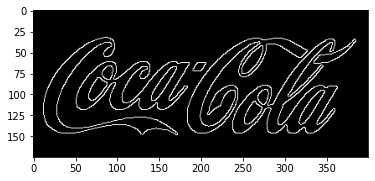

In [15]:
# Cargo el template, aplico Canny para deteccion de bordes e imprimo las dimensiones
template = cv.imread('./template/pattern.png')
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
template = cv.Canny(template, 50, 200, L2gradient=True)
(tH, tW) = template.shape[:2]

print(tH, tW)
plt.imshow(template, cmap='gray')

In [40]:
# Veo las dimensiones de las imagenes donde tengo que encontrar el patron
images_path = [
    './images/coca_logo_1.png', './images/coca_logo_2.png',
    './images/coca_multi.png', './images/coca_retro_1.png', 
    './images/coca_retro_2.png', './images/COCA-COLA-LOGO.jpg', 
    './images/logo_1.png'
]

for path in images_path:
    imag_ = cv.imread(path)
    (h, w) = imag_.shape[:2]
    print(h, w)

500 207
363 233
598 799
493 715
429 715
1389 1389
450 687


Confianza:  100.0
Escala:  1.9500000000000002


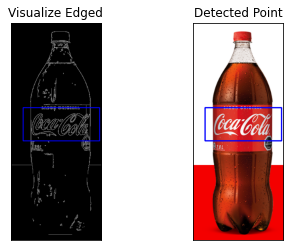

Confianza:  99.99999403953552
Escala:  1.7500000000000002


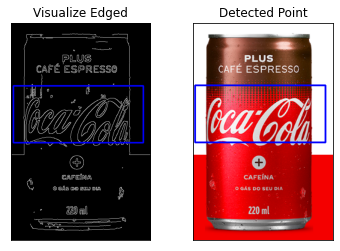

Confianza:  100.0
Escala:  0.55


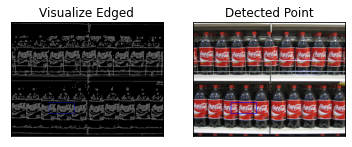

Confianza:  100.0
Escala:  0.6000000000000001


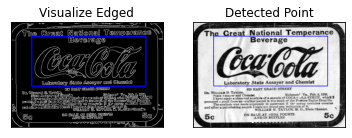

Confianza:  100.0
Escala:  0.6000000000000001


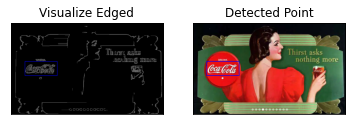

Confianza:  100.0
Escala:  0.3


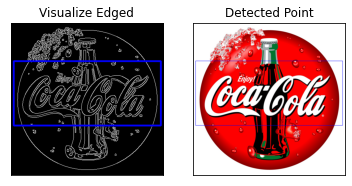

Confianza:  100.0
Escala:  0.6000000000000001


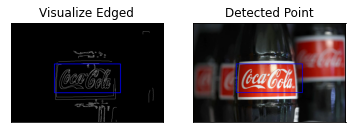

In [42]:
# Para cada imagen
for path in images_path:
    # Cargo imagen
    imag_ = cv.imread(path)

    # Aplico conversiones de color
    image = cv.cvtColor(imag_, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(imag_, cv.COLOR_BGR2GRAY)
    
    found = None
    last_scale = None
    best_result = None

    # Busco escalas, comenzado desde mas grande a mas chico.
    # Al principio agranda y luego achica hasta que no puede mas por las dimensiones
    for scale in np.linspace(0.05, 3.0, 60)[::-1]:
        # Resize
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        
        # Si la imagen quedo mas chica que el template corto
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        # Me guardo la ultima escala que anduvo bien y el ratio
        last_scale = scale
        r = gray.shape[1] / float(resized.shape[1])
        
        # Aplico Canny a la imagen
        edged = cv.Canny(resized, 50, 200, L2gradient=True)

        # Busco hacer el match
        result = cv.matchTemplate(edged, template, cv.TM_CCOEFF)

        #Encontramos los valores maximos
        (_, maxVal, _, maxLoc) = cv.minMaxLoc(result)
        
        # Si es la primera o si es un mejor match
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)
            # https://stackoverflow.com/questions/61297970/python-opencv-certaincy-score-templatematch
            # https://answers.opencv.org/question/8890/calculating-a-template-matching-similarity-score/
            # Normalizo resultado
            normalized = cv.normalize(result, result, 0, 1, cv.NORM_MINMAX)
            best_result = cv.minMaxLoc(normalized)
            clone = np.dstack([edged, edged, edged])
            cv.rectangle(clone, (maxLoc[0], maxLoc[1]), (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 4)

    # Unpack de valores
    (_, maxLoc, r) = found

    # Marco el lugar donde se encontró
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
    cv.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)

    print("Confianza: ", best_result[1] * 100)
    print("Escala: ", last_scale)

    plt.subplot(121),plt.imshow(clone)
    plt.title('Visualize Edged'), plt.xticks([]), plt.yticks([])

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(image)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.show()

#### Conclusiones Parte 1

#### Parte 2

#### Objetivo

Desarrollar un algoritmo para realizar multiples detecciones del logo de Coca Cola en una imagen.

#### Conclusiones Parte 2